<a href="https://colab.research.google.com/github/adil-ak/machine_learning/blob/main/Task_1_(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('Copy of pp-2018.csv')
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category,Record Status
0,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000.0,23-01-2018 00:00,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000.0,19-01-2018 00:00,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000.0,22-01-2018 00:00,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000.0,19-01-2018 00:00,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A
4,{666758D7-43B4-3363-E053-6B04A8C0D74E},180000.0,31-01-2018 00:00,SY3 0NQ,S,N,F,79,NaN,LYTHWOOD ROAD,BAYSTON HILL,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A


In [2]:
df.isnull().sum()

,0
TID,0
Price,1
Sale Date,1
Postcode,3557
Property Type,1
New Build,1
Tenure,1
PAON,1
SAON,534123
Street,12014


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Sale Date'] = pd.to_datetime(df['Sale Date'])

<ipython-input-5-cfe9c26951e8>:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Sale Date'] = pd.to_datetime(df['Sale Date'])


In [6]:
df_2018=df[df['Sale Date'].dt.year==2018]

In [9]:
df_2018['Month'] = df_2018['Sale Date'].dt.to_period('M')

<ipython-input-9-5359338bc299>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Month'] = df_2018['Sale Date'].dt.to_period('M')


In [10]:
monthly_sales = df_2018.groupby('Month').size()

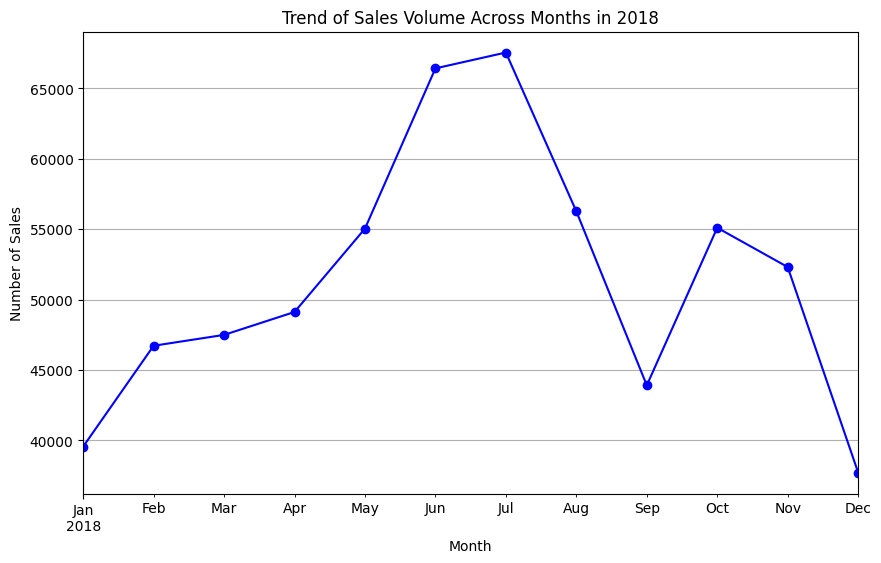

In [11]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Trend of Sales Volume Across Months in 2018')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.grid()
plt.show()

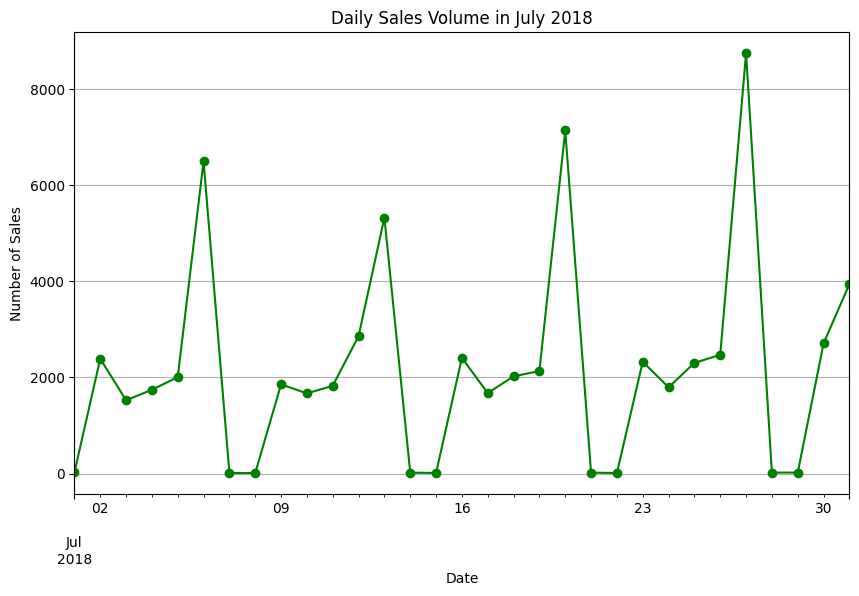

In [14]:
july_2018 = df_2018[df_2018['Sale Date'].dt.month == 7]

daily_sales_july = july_2018.groupby('Sale Date').size()

plt.figure(figsize=(10, 6))
daily_sales_july.plot(kind='line', marker='o', color='green')
plt.title('Daily Sales Volume in July 2018')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.grid()
plt.show()

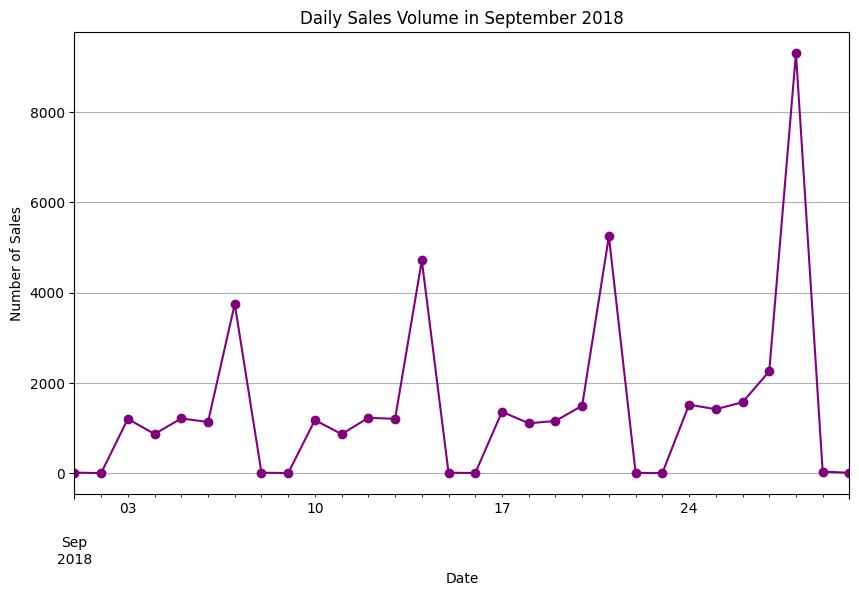

In [15]:
sep_2018 = df_2018[df_2018['Sale Date'].dt.month == 9]

daily_sales_sep = sep_2018.groupby('Sale Date').size()

plt.figure(figsize=(10, 6))
daily_sales_sep.plot(kind='line', marker='o', color='purple')
plt.title('Daily Sales Volume in September 2018')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.grid()
plt.show()


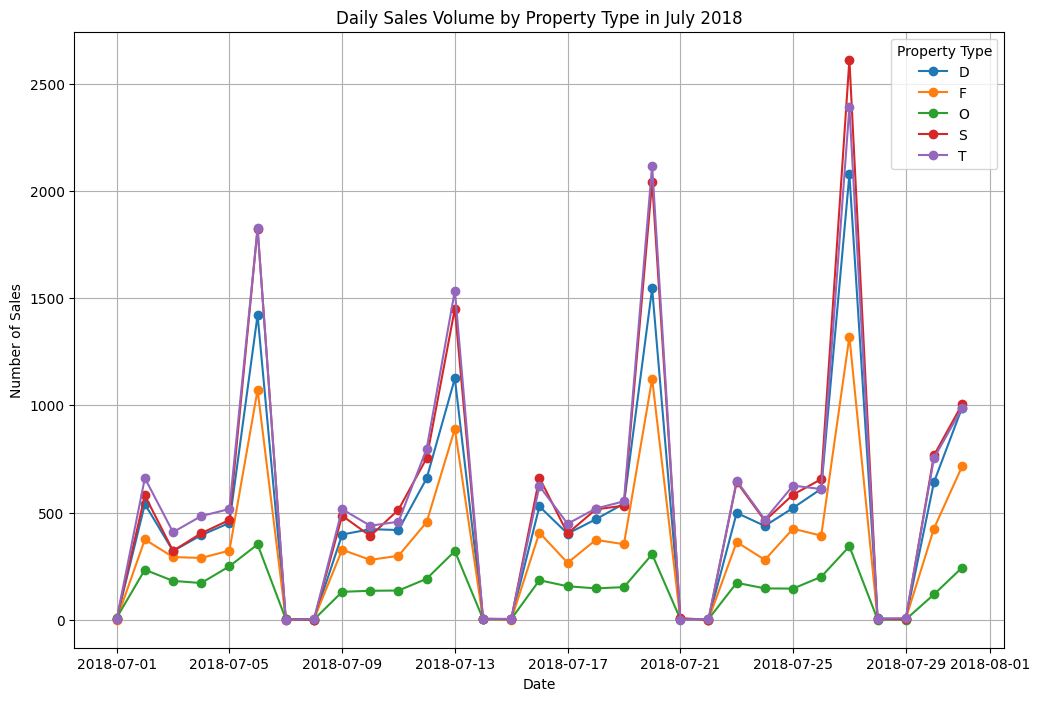

In [25]:
daily_sales_july_by_type = july_2018.groupby(['Sale Date', 'Property Type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
for column in daily_sales_july_by_type.columns:
    plt.plot(daily_sales_july_by_type.index, daily_sales_july_by_type[column], marker='o', label=column)
plt.title('Daily Sales Volume by Property Type in July 2018')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.legend(title='Property Type')
plt.grid()
plt.show()

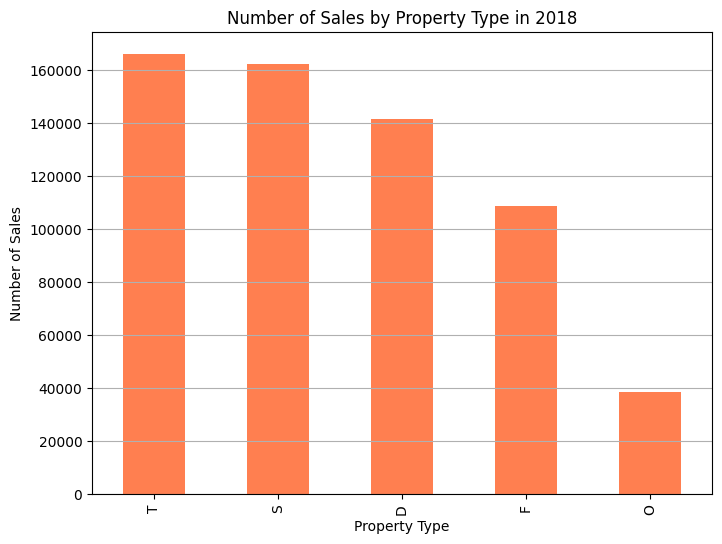

In [18]:
sales_by_type_2018 = df_2018['Property Type'].value_counts()

plt.figure(figsize=(8, 6))
sales_by_type_2018.plot(kind='bar', color='coral')
plt.title('Number of Sales by Property Type in 2018')
plt.xlabel('Property Type')
plt.ylabel('Number of Sales')
plt.grid(axis='y')
plt.show()

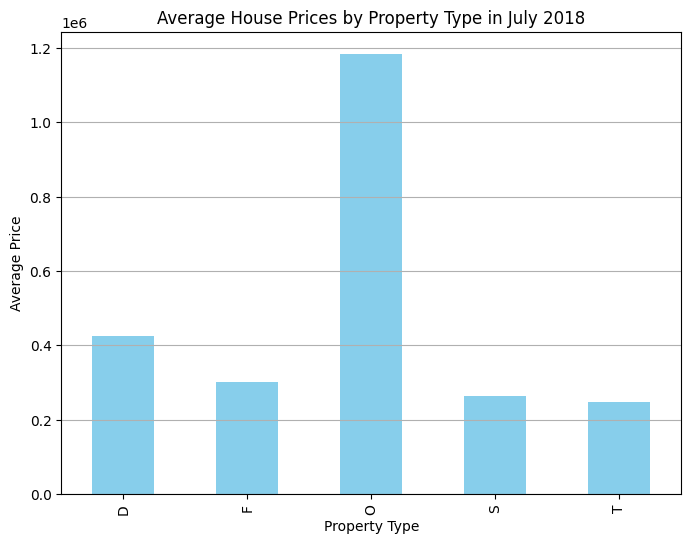

In [19]:
avg_price_july = july_2018.groupby('Property Type')['Price'].mean()

plt.figure(figsize=(8, 6))
avg_price_july.plot(kind='bar', color='skyblue')
plt.title('Average House Prices by Property Type in July 2018')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.grid(axis='y')
plt.show()

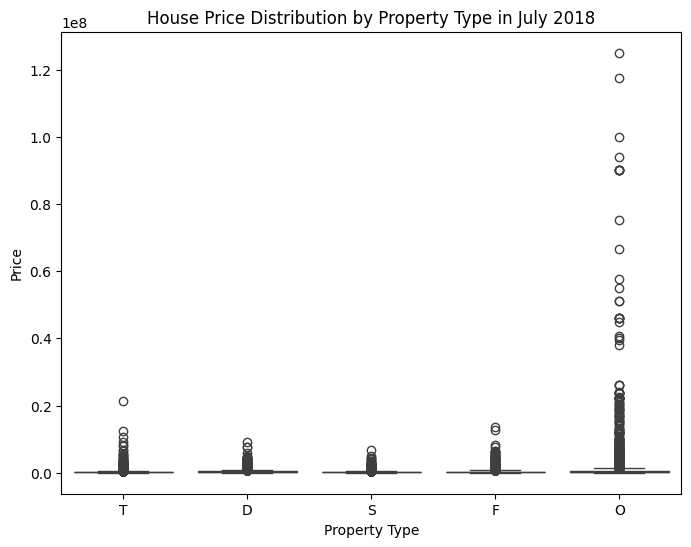

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Property Type', y='Price', data=july_2018)
plt.title('House Price Distribution by Property Type in July 2018')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

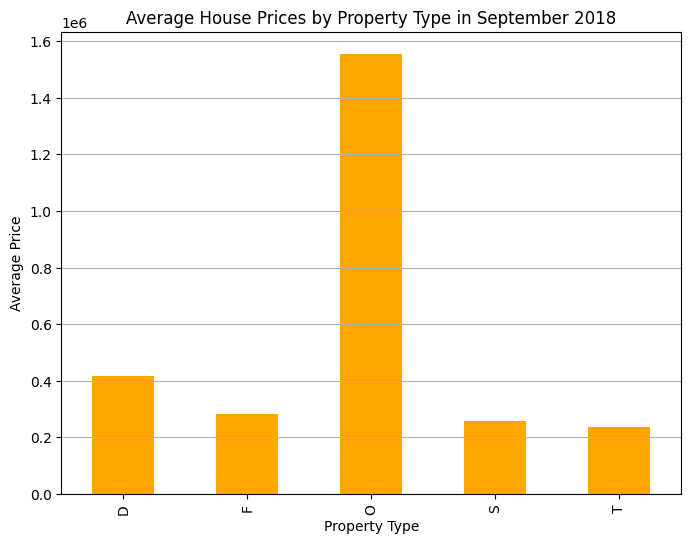

In [26]:
avg_price_sep = sep_2018.groupby('Property Type')['Price'].mean()

plt.figure(figsize=(8, 6))
avg_price_sep.plot(kind='bar', color='orange')
plt.title('Average House Prices by Property Type in September 2018')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.grid(axis='y')
plt.show()

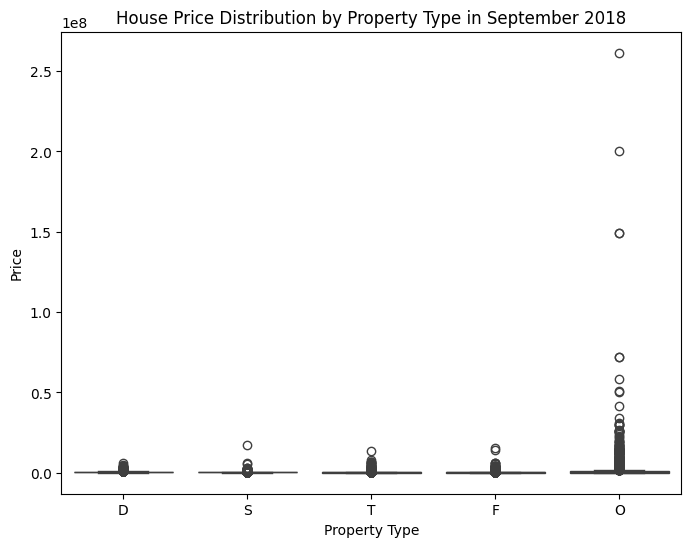

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Property Type', y='Price', data=sep_2018)
plt.title('House Price Distribution by Property Type in September 2018')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

<Axes: >

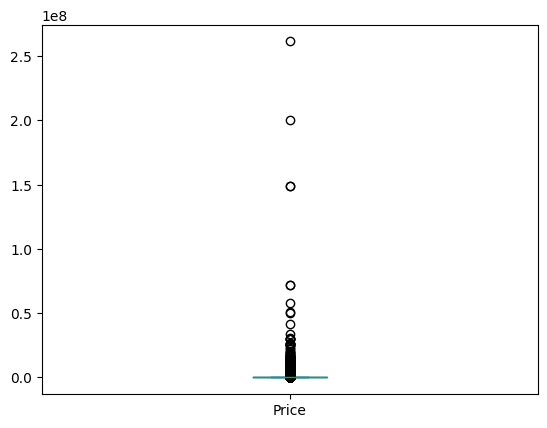

In [28]:
sep_2018.plot(kind='box')